In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 파이 차트

           mpg  cylinders  displacement    weight  acceleration  model yaer  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


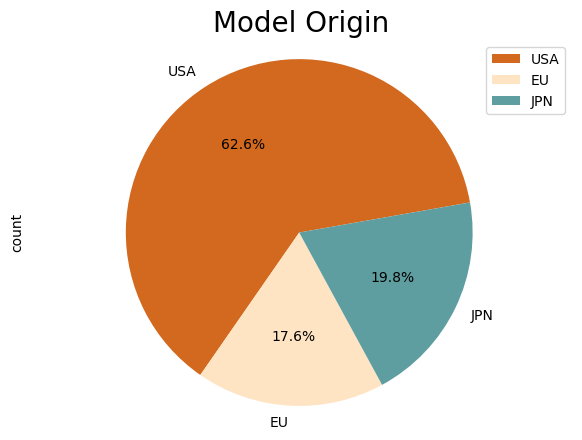

In [2]:
plt.style.use('default')

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model yaer','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA','EU','JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind = 'pie',
                       figsize = (7,5),
                       autopct = '%1.1f%%',
                       startangle = 10,
                       colors = ['chocolate','bisque','cadetblue'])
plt.title('Model Origin', size = 20)
plt.axis('equal') # 파이 차트의 비율을 같에(원에 가깝게) 조정
plt.legend(labels = df_origin.index, loc = 'upper right')
plt.show()

## 박스 플롯

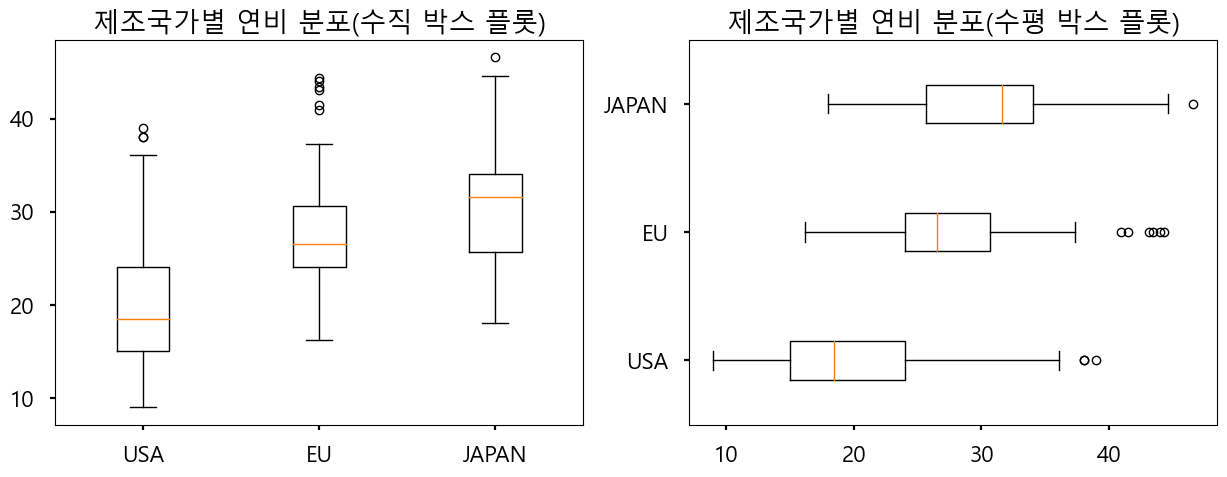

In [6]:
plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = True

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model yaer','origin','name']

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin'] == 1]['mpg'],
           df[df['origin'] == 2]['mpg'],
           df[df['origin'] == 3]['mpg']],
           labels = ['USA','EU','JAPAN'])

ax2.boxplot(x=[df[df['origin'] == 1]['mpg'],
           df[df['origin'] == 2]['mpg'],
           df[df['origin'] == 3]['mpg']],
           labels = ['USA','EU','JAPAN'],
           vert = False) # 수평 박스 플롯

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')
plt.show()